# Demo 2 - Genetic ancestry & Principal Component Analysis (PCA)
***

## Following up on our last demo, we had created LD pruned BED files.

## Step 1. We will start with creating eigne vectors & eigned values using plink. 
***
___

### Plink provides a convenient functionality for performing PCA

`ls data/allCombinedLD*`

```
data/allCombinedLDPruned.bed  data/allCombinedLDPruned.fam
data/allCombinedLDPruned.bim
```

In [3]:
!plink --bfile data/allCombinedLDPruned --pca --out data/allCombinedLDPruned

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/allCombinedLDPruned.log.
Options in effect:
  --bfile data/allCombinedLDPruned
  --out data/allCombinedLDPruned
  --pca

511706 MB RAM detected; reserving 255853 MB for main workspace.
139469 variants loaded from .bim file.
394 people (0 males, 0 females, 394 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/allCombinedLDPruned.nosex .
Using up to 27 threads (change this with --threads).
Before main variant filters, 394 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999632.
139469 variants and 394 people pass filters and QC.
Note: No phenotypes present.
Relationship matr

### Once plink completes running the PCA, it outputs top 20 PCs (by default) ordered by how much variance each of them explains. 

`ls data/allCombinedLDPruned.eigen`

```
data/allCombinedLDPruned.eigenval  data/allCombinedLDPruned.eigenvec
```

## Step 2. We will now switch to the programming language **R** to create PCA plots.

In [2]:
#Import the library.
options(scipen=100, digits=3)
library("plyr")
library('dplyr')
library('ggplot2')

In [3]:
#Process the eignevector file and get the top two PCs.
eigenvec <- read.table('data/allCombinedLDPruned.eigenvec', header = TRUE, sep = ' ')
rownames(eigenvec) <- eigenvec[,2]
eigenvec <- eigenvec[,3:ncol(eigenvec)]
colnames(eigenvec) <- paste('PC', c(1:20), sep = '')
eigenvec$IndividualID = row.names(eigenvec)
eigenvec = eigenvec[c("IndividualID", "PC1", "PC2")]
row.names(eigenvec) <- NULL

Warning message in file(file, "rt"):
“cannot open file 'data/allCombinedLDPruned.eigenvec': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [4]:
print(eigenvec)

    IndividualID       PC1        PC2
1        HG01501 -0.030645  0.0521766
2        HG01503 -0.030339  0.0548116
3        HG01504 -0.033870  0.0556305
4        HG01506 -0.031622  0.0606803
5        HG01507 -0.033036  0.0538049
6        HG01509 -0.032411  0.0565805
7        HG01510 -0.030644  0.0532440
8        HG01512 -0.033992  0.0595671
9        HG01513 -0.033997  0.0587331
10       HG01515 -0.032708  0.0534642
11       HG01516 -0.031511  0.0555228
12       HG01518 -0.032816  0.0504474
13       HG01519 -0.033304  0.0529059
14       HG01521 -0.033083  0.0538110
15       HG01522 -0.034755  0.0599363
16       HG01524 -0.031066  0.0559838
17       HG01525 -0.029184  0.0535798
18       HG01527 -0.031716  0.0497068
19       HG01528 -0.030960  0.0560995
20       HG01530 -0.032159  0.0552442
21       HG01531 -0.031301  0.0567325
22       HG01536 -0.032419  0.0555784
23       HG01537 -0.034066  0.0532204
24       HG01602 -0.030186  0.0487573
25       HG01603 -0.029430  0.0516298
26       HG0

In [5]:
#Obtain and merge with population group data.
individualToPopGroupData = read.table('data/allCombinedIndividualsToPop.txt', col.names = c("PopGroup", "IndividualID"), header = FALSE)
combinedPCsPopGroups = join(eigenvec, individualToPopGroupData)
print(combinedPCsPopGroups)

Joining by: IndividualID



    IndividualID       PC1        PC2 PopGroup
1        HG01501 -0.030645  0.0521766      IBS
2        HG01503 -0.030339  0.0548116      IBS
3        HG01504 -0.033870  0.0556305      IBS
4        HG01506 -0.031622  0.0606803      IBS
5        HG01507 -0.033036  0.0538049      IBS
6        HG01509 -0.032411  0.0565805      IBS
7        HG01510 -0.030644  0.0532440      IBS
8        HG01512 -0.033992  0.0595671      IBS
9        HG01513 -0.033997  0.0587331      IBS
10       HG01515 -0.032708  0.0534642      IBS
11       HG01516 -0.031511  0.0555228      IBS
12       HG01518 -0.032816  0.0504474      IBS
13       HG01519 -0.033304  0.0529059      IBS
14       HG01521 -0.033083  0.0538110      IBS
15       HG01522 -0.034755  0.0599363      IBS
16       HG01524 -0.031066  0.0559838      IBS
17       HG01525 -0.029184  0.0535798      IBS
18       HG01527 -0.031716  0.0497068      IBS
19       HG01528 -0.030960  0.0560995      IBS
20       HG01530 -0.032159  0.0552442      IBS
21       HG01

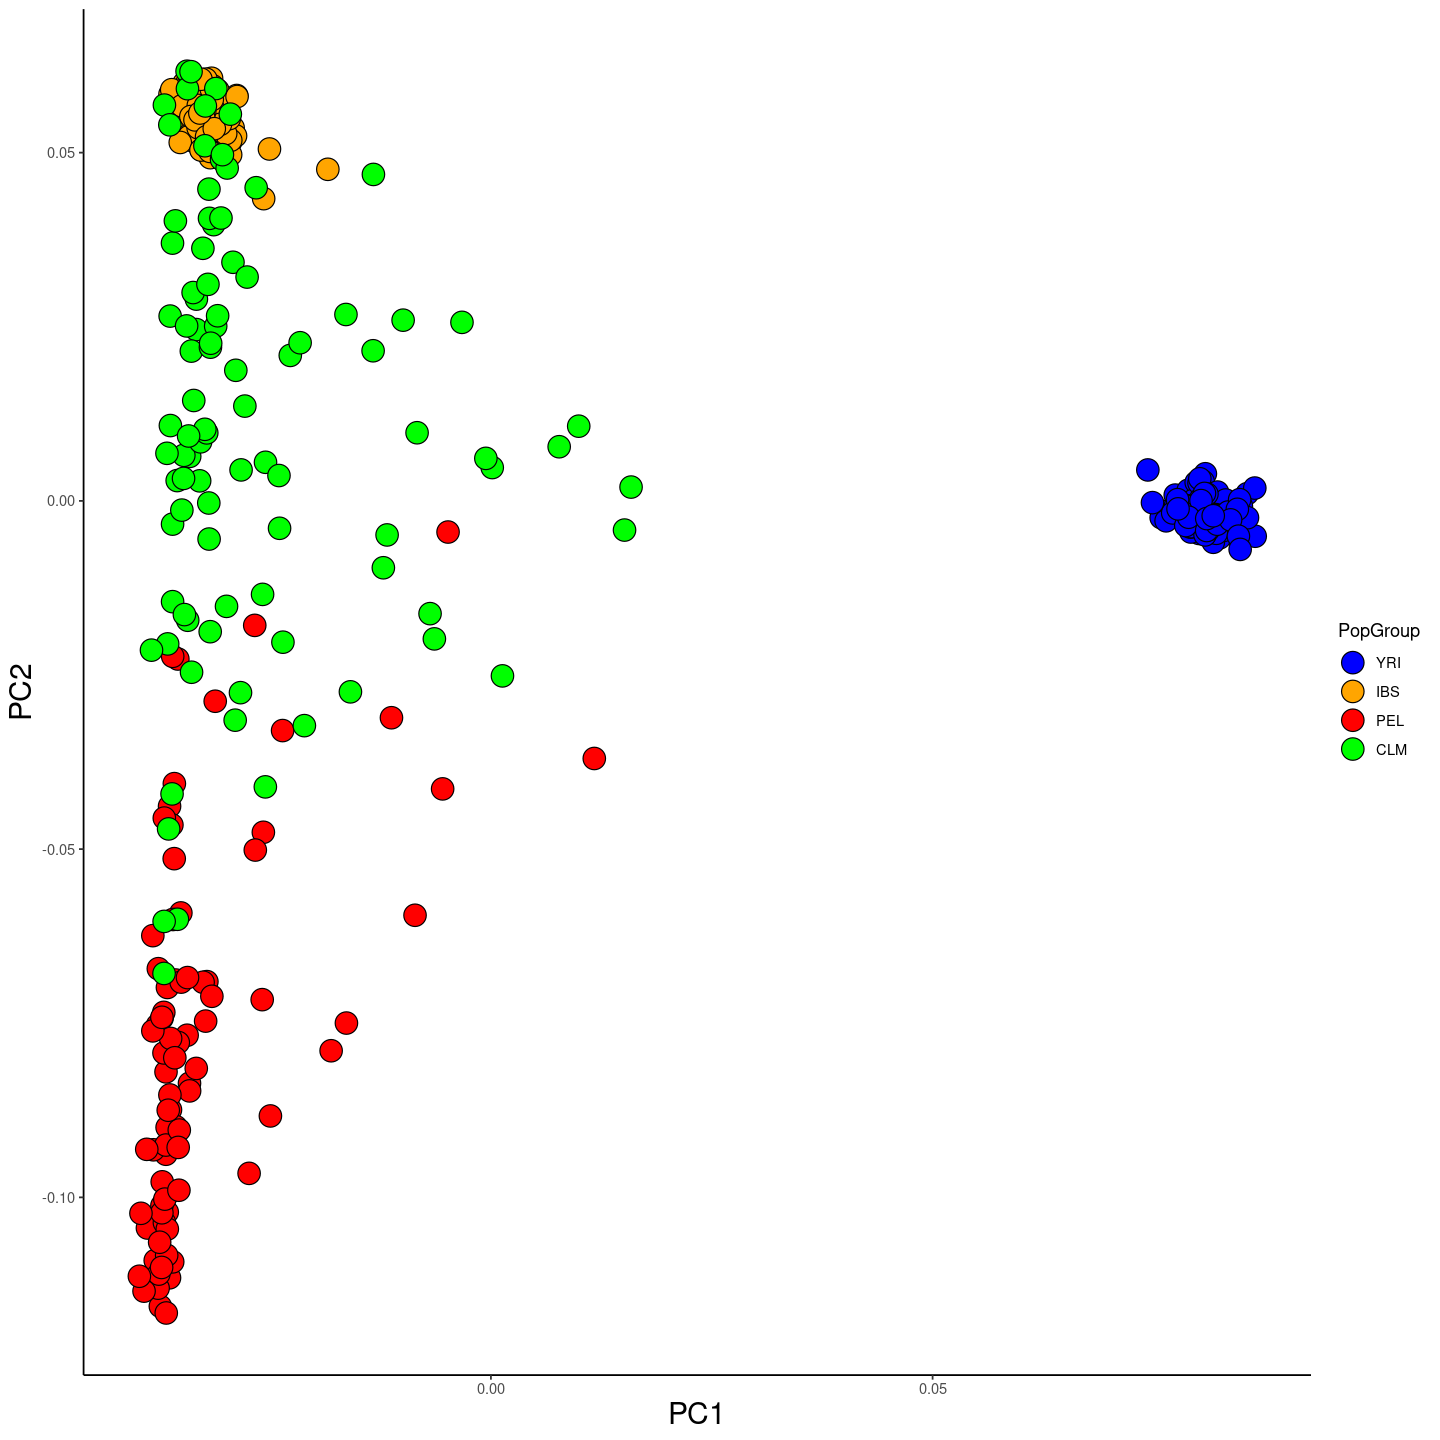

In [6]:
colors  <- c("YRI" = "blue", "IBS" = "orange", "PEL" = "red", "CLM" = "green")

#Plotting PCA plot for the top two PCs.
options(repr.plot.width=12, repr.plot.height=12)
ggplot(combinedPCsPopGroups, aes(x=PC1, y=PC2, fill=PopGroup)) + scale_fill_manual(values=colors) +
  geom_point(size = 6, pch = 21, color="black") + theme_classic() + theme(axis.title=element_text(size=18))


In [16]:
#Plotting the scree plots to explain the relative importance of each PCs.
eigenvalue <- read.table('data/allCombinedLDPruned.eigenval', header = FALSE, sep = ' ', col.names = c("EigenValue"))
eigenvalue$PCs <- c(1:20)
eigenvalue = eigenvalue[0:6, ]

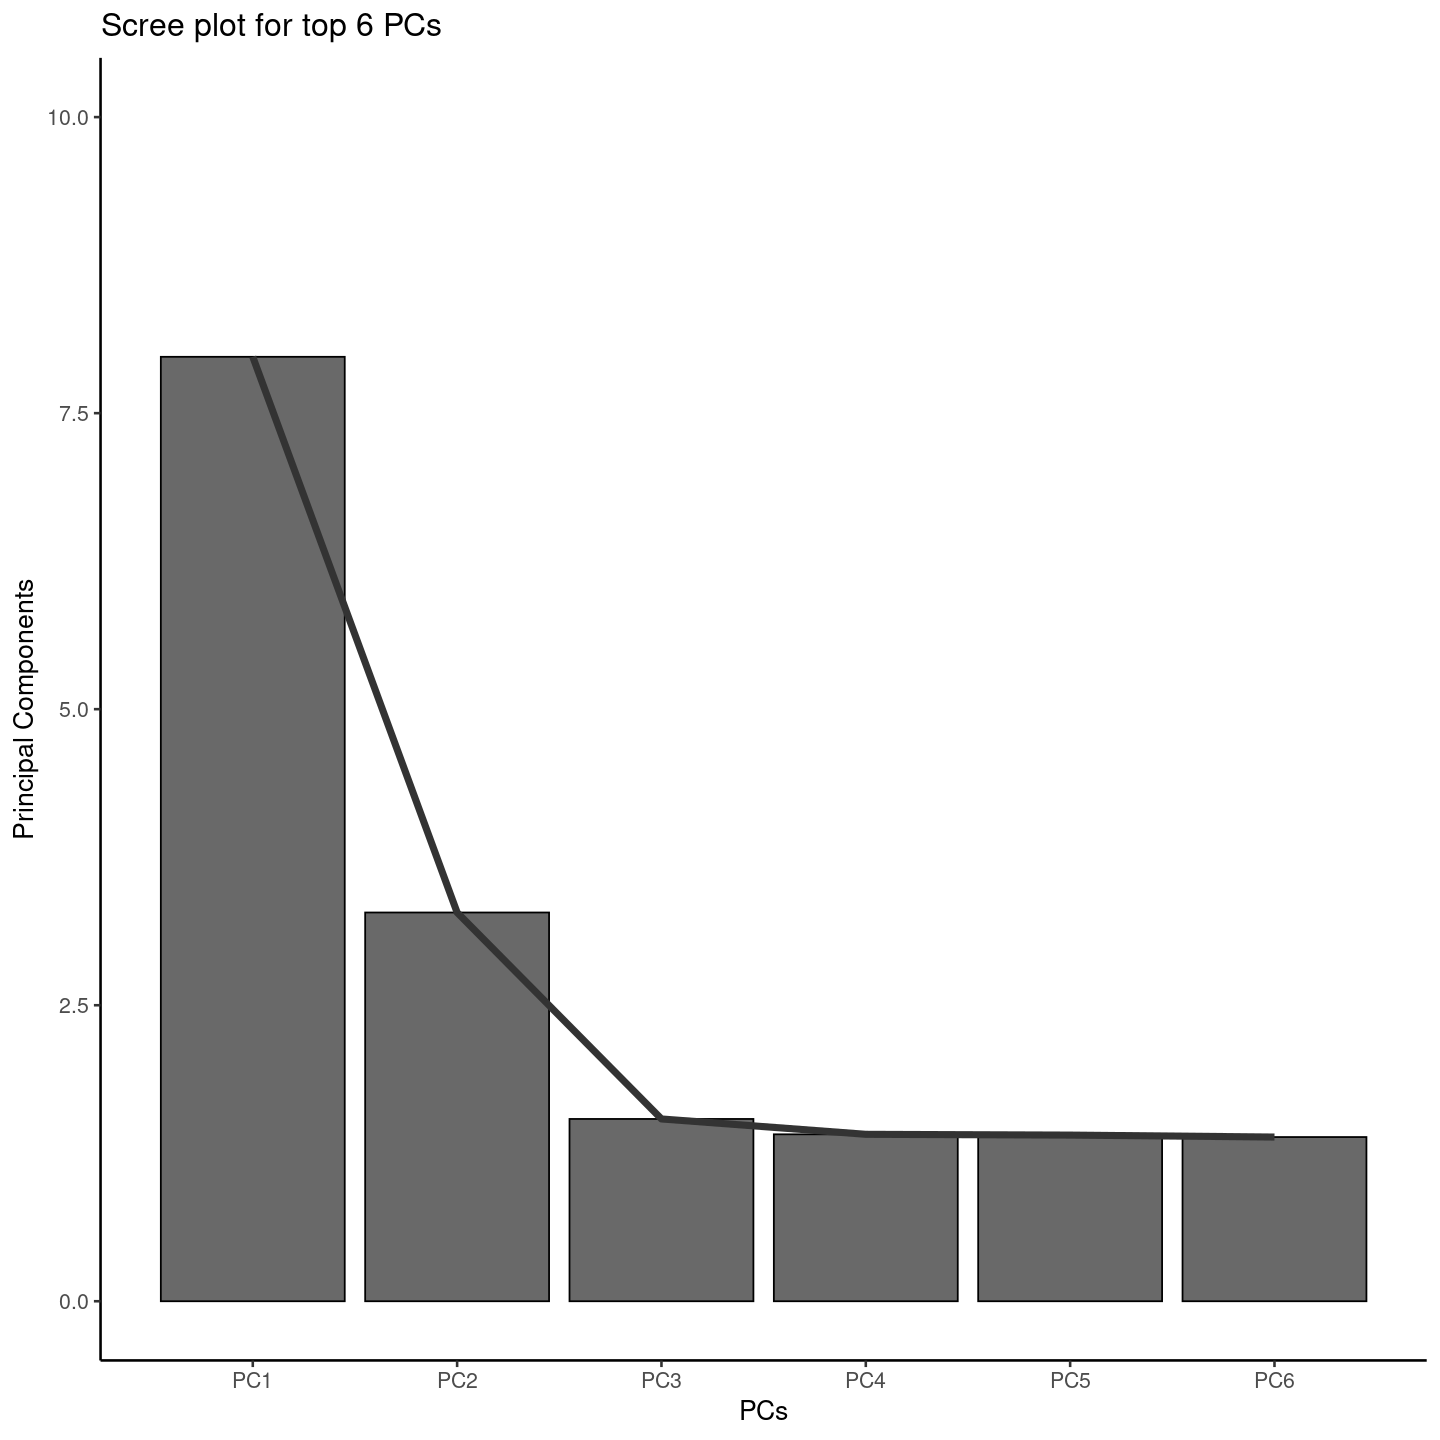

In [35]:
options(repr.plot.width=12, repr.plot.height=12)
ggplot(data=eigenvalue, aes(x=PCs, y=EigenValue)) +
    geom_bar(stat="identity", fill = "dimgrey", color = "black") + geom_line(size = 2, color = "gray20") + 
    scale_x_continuous(breaks=1:6,labels=c("PC1","PC2","PC3","PC4","PC5","PC6")) + ylim(0,10) +
    labs(y="Principal Components", title = "Scree plot for top 6 PCs") + theme_classic(base_size = 16)